In [171]:
import numpy as np
import pandas as pd

In [172]:
df = pd.read_csv('./dataset/completeSpamAssassin.csv')

In [173]:
df.sample(5)

,Unnamed: 0,Body,Label
1620,1620,â€101æ•™è‚²ç½‘â€œæŽ¨èã€Šé­”é¬¼è‹±è¯­ã€‹\nâ€...,1
5554,5554,"On Wed, 2002-07-24 at 03:50, Angles Puglisi wr...",0
234,234,NIGERIA ELECTIRC POWER AUTHORITY \nFEDERAL SEC...,1
3577,3577,[Jeremy Hylton[\n> The total collections are 1...,0
3406,3406,"Justin Mason wrote:>> Interestingly, some of t...",0


In [174]:
df.shape

(6046, 3)

In [105]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [176]:
# drop last 3 cols
df.drop(columns=['Unnamed: 0'],inplace=True)

In [177]:
df.sample(5)

,Body,Label
47,DON'T MISS OUT ON AN AMAZING BUSINESS OPPORTUN...,1
4848,"On Mon, Aug 19, 2002 at 11:50:25AM +0100, Coli...",0
2716,"On Mon, 2002-09-30 at 09:20, Owen Byrne wrote:...",0
5090,"""This is a very tenuous time for Microsoft,"" G...",0
5214,\nYou're in luck because my mom sends these al...,0


In [178]:
# renaming the cols
df.rename(columns={'Label':'target','Body':'text'},inplace=True)
df.insert(0,'target', df.pop('target'))
df.sample(5)


,target,text
579,1,Snoring problems? Let Snore\nEliminator's all ...
6024,0,change your settings: http://blo.gs/settings.p...
2228,0,"On Sat, 2002-08-24 at 08:04, Gregory Alan Bolc..."
934,1,New Web Technology\nUNLIMITED WEB CONFERENCING...
4965,0,This is a semi-followup on my previous questio...


In [179]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [180]:
df['target'] = encoder.fit_transform(df['target'])

In [181]:
df.head()

,target,text
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...
3,1,##############################################...
4,1,I thought you might like these:\n1) Slim Down ...


In [182]:
# missing values
df.isnull().sum()

target    0
text      1
dtype: int64

In [183]:
# check for duplicate values
df.duplicated().sum()

752

In [184]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [185]:
df.duplicated().sum()

0

In [186]:
df.shape

(5294, 2)

## 2.EDA

In [187]:
df.head()

,target,text
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...
3,1,##############################################...
4,1,I thought you might like these:\n1) Slim Down ...


In [188]:
df['target'].value_counts()

target
0    3915
1    1379
Name: count, dtype: int64

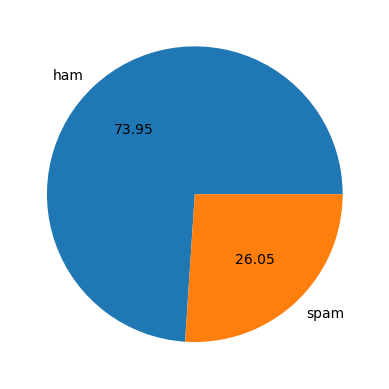

In [189]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [190]:
# Data is imbalanced

In [191]:
import nltk

In [192]:
%pip install nltk

In [193]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [194]:
df['num_characters'] = df['text'].astype("str").apply(len)

In [195]:
df.head()

,target,text,num_characters
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...,1111
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,753
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,610
3,1,##############################################...,2863
4,1,I thought you might like these:\n1) Slim Down ...,641


In [196]:
# num of words
df['num_words'] = df['text'].astype("str").apply(lambda x:len(nltk.word_tokenize(x)))

In [197]:
df.head()

,target,text,num_characters,num_words
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...,1111,191
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,753,139
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,610,113
3,1,##############################################...,2863,690
4,1,I thought you might like these:\n1) Slim Down ...,641,108


In [198]:
df['num_sentences'] = df['text'].astype("str").apply(lambda x:len(nltk.sent_tokenize(x)))

In [199]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...,1111,191,12
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,753,139,5
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,610,113,4
3,1,##############################################...,2863,690,35
4,1,I thought you might like these:\n1) Slim Down ...,641,108,4


In [200]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5294.000000,5294.000000,5294.000000
mean,1947.356819,363.346997,12.808840
std,5228.319411,804.059966,28.024741
min,1.000000,0.000000,0.000000
25%,561.000000,105.000000,4.000000
50%,1005.000000,192.000000,7.000000
75%,1751.000000,346.000000,12.000000
max,194978.000000,18564.000000,808.000000


In [201]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3915.000000,3915.000000,3915.000000
mean,1792.657471,340.492976,11.456705
std,5025.721947,776.136277,26.053497
min,5.000000,1.000000,1.000000
25%,522.000000,97.000000,4.000000
50%,960.000000,189.000000,6.000000
75%,1650.000000,328.000000,11.000000
max,194978.000000,18564.000000,808.000000


In [202]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1379.000000,1379.000000,1379.000000
mean,2386.550399,428.229877,16.647571
std,5744.109911,875.565505,32.692510
min,1.000000,0.000000,0.000000
25%,673.500000,119.500000,5.000000
50%,1094.000000,201.000000,9.000000
75%,2167.000000,408.000000,15.000000
max,129635.000000,13288.000000,406.000000


In [203]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

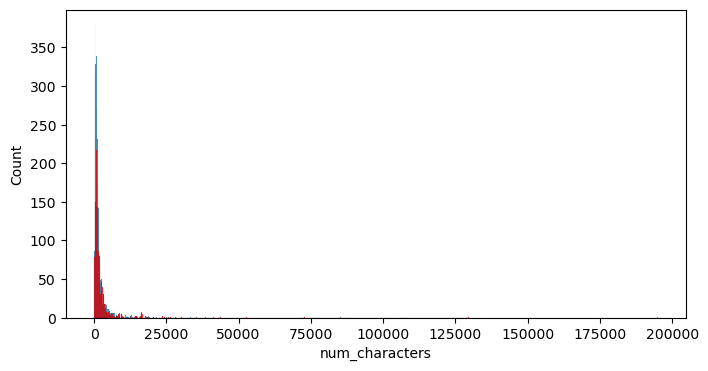

In [204]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

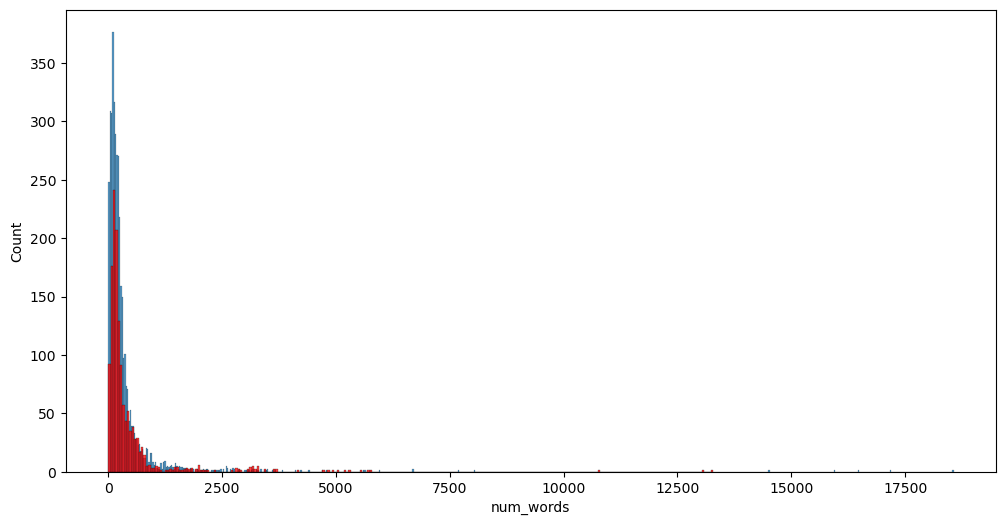

In [205]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,target,text,num_characters,num_words,num_sentences
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...,1111,191,12
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,753,139,5
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,610,113,4
3,1,##############################################...,2863,690,35
4,1,I thought you might like these:\n1) Slim Down ...,641,108,4


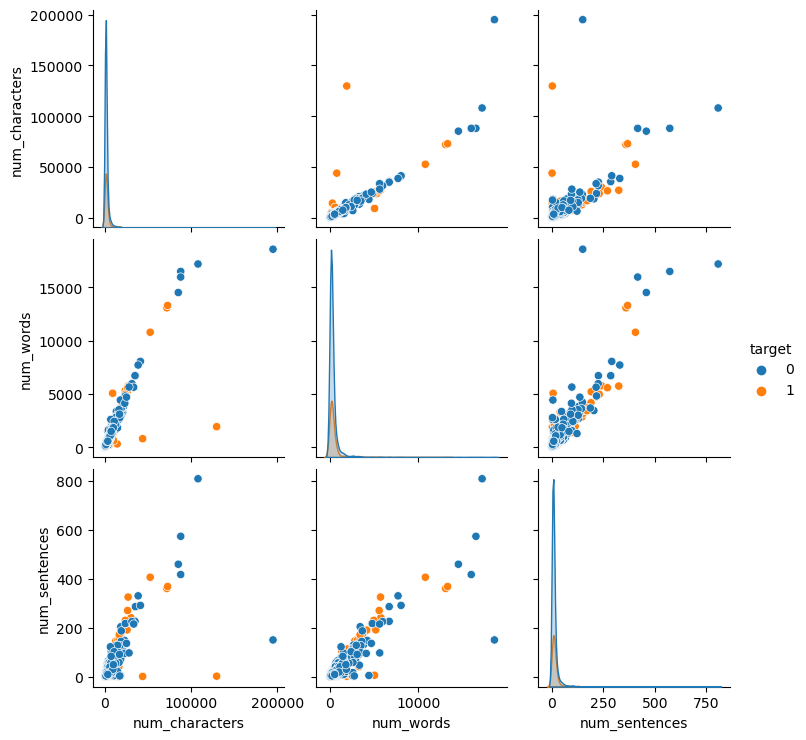

In [206]:
sns.pairplot(df,hue='target')
df.head()


<Axes: >

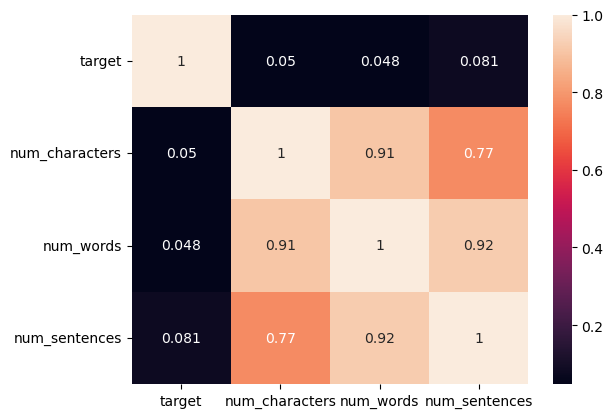

In [209]:

dfCorr = df[['target','num_characters','num_words','num_sentences']].corr()
sns.heatmap(dfCorr,annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [210]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [211]:
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [212]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...,1111,191,12
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,753,139,5
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,610,113,4
3,1,##############################################...,2863,690,35
4,1,I thought you might like these:\n1) Slim Down ...,641,108,4


In [213]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [215]:
df['transformed_text'] = df['text'].astype("str").apply(transform_text)

In [216]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,1,##############################################...,2863,690,35,adult club offer free membership instant acces...
4,1,I thought you might like these:\n1) Slim Down ...,641,108,4,thought might like 1 slim guarante lose lb 30 ...


In [217]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [218]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

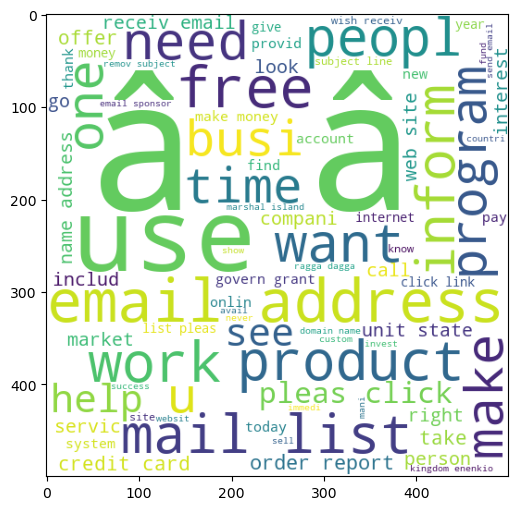

In [219]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [220]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

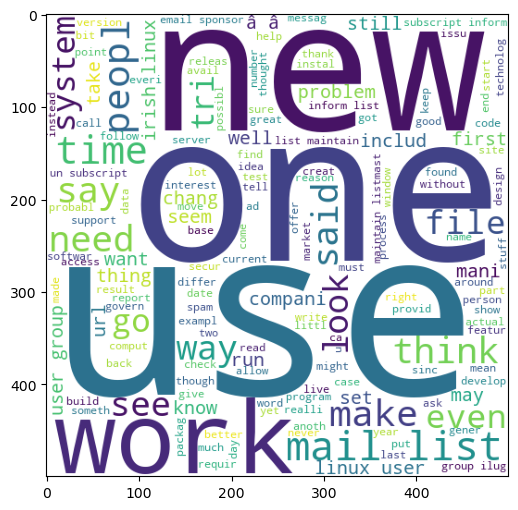

In [221]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [222]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,1,##############################################...,2863,690,35,adult club offer free membership instant acces...
4,1,I thought you might like these:\n1) Slim Down ...,641,108,4,thought might like 1 slim guarante lose lb 30 ...


In [223]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [224]:
len(spam_corpus)

252427

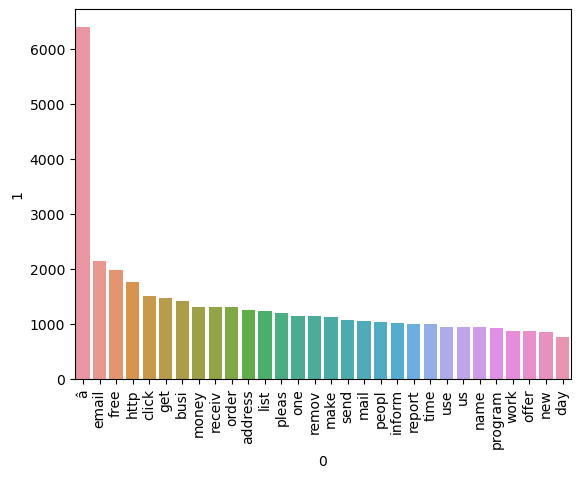

In [232]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30)), x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [233]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [234]:
len(ham_corpus)

544805

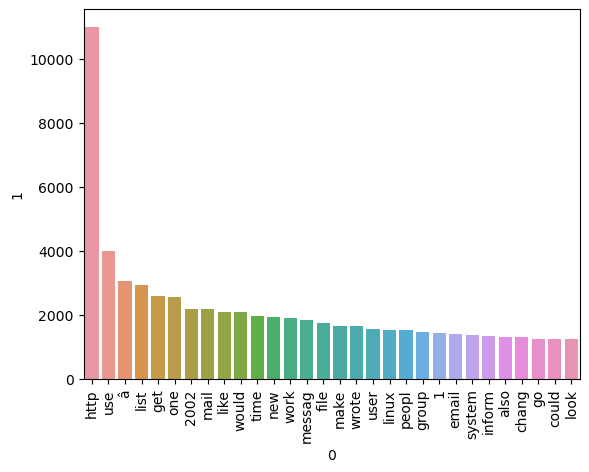

In [235]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30)), x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [236]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,\nSave up to 70% on Life Insurance.\nWhy Spend...,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,1,##############################################...,2863,690,35,adult club offer free membership instant acces...
4,1,I thought you might like these:\n1) Slim Down ...,641,108,4,thought might like 1 slim guarante lose lb 30 ...


## 4. Model Building

In [295]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [296]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [292]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [240]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [297]:
X.shape

(5294, 3000)

In [298]:
y = df['target'].values

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [301]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [302]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [247]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.927289896128423
[[740  30]
 [ 47 242]]
0.8897058823529411


In [303]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9565627950897073
[[754  16]
 [ 30 259]]
0.9418181818181818


In [249]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9263456090651558
[[746  24]
 [ 54 235]]
0.9073359073359073


In [250]:
# tfidf --> MNB

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [252]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [253]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [254]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [255]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9763928234183191, 0.9647887323943662)

In [256]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9763928234183191
Precision -  0.9647887323943662
For  KN
Accuracy -  0.4145420207743154
Precision -  0.31712707182320443
For  NB
Accuracy -  0.9565627950897073
Precision -  0.9418181818181818
For  DT
Accuracy -  0.9036827195467422
Precision -  0.8785425101214575
For  LR
Accuracy -  0.9650613786591123
Precision -  0.9632352941176471
For  RF
Accuracy -  0.9697828139754485
Precision -  0.9572953736654805
For  AdaBoost
Accuracy -  0.9584513692162417
Precision -  0.9422382671480144
For  BgC
Accuracy -  0.9537299338999056
Precision -  0.9195804195804196
For  ETC
Accuracy -  0.9726156751652503
Precision -  0.9850746268656716
For  GBDT
Accuracy -  0.9320113314447592
Precision -  0.9392712550607287
For  xgb
Accuracy -  0.9631728045325779
Precision -  0.9595588235294118


In [257]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [258]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.972616,0.985075
0,SVC,0.976393,0.964789
4,LR,0.965061,0.963235
10,xgb,0.963173,0.959559
5,RF,0.969783,0.957295
6,AdaBoost,0.958451,0.942238
2,NB,0.956563,0.941818
9,GBDT,0.932011,0.939271
7,BgC,0.953730,0.919580
3,DT,0.903683,0.878543


In [259]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [260]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.972616
1,SVC,Accuracy,0.976393
2,LR,Accuracy,0.965061
3,xgb,Accuracy,0.963173
4,RF,Accuracy,0.969783
5,AdaBoost,Accuracy,0.958451
6,NB,Accuracy,0.956563
7,GBDT,Accuracy,0.932011
8,BgC,Accuracy,0.953730
9,DT,Accuracy,0.903683


/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


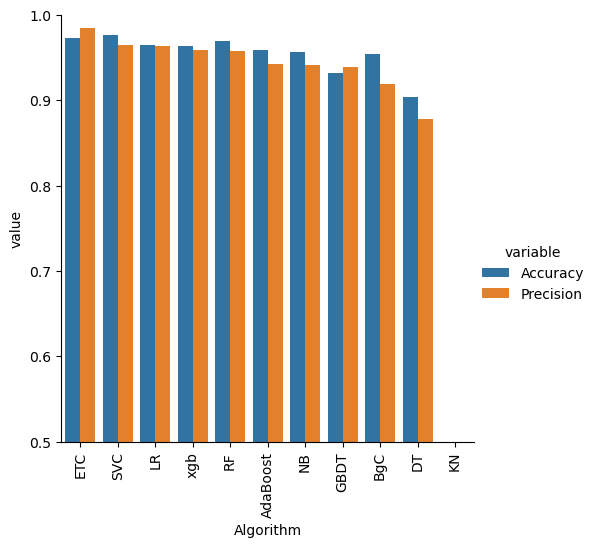

In [261]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [262]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [263]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [264]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [265]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [266]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [267]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.972616,0.985075,0.972616,0.985075,0.972616,0.985075,0.972616,0.985075
1,SVC,0.976393,0.964789,0.976393,0.964789,0.976393,0.964789,0.976393,0.964789
2,LR,0.965061,0.963235,0.965061,0.963235,0.965061,0.963235,0.965061,0.963235
3,xgb,0.963173,0.959559,0.963173,0.959559,0.963173,0.959559,0.963173,0.959559
4,RF,0.969783,0.957295,0.969783,0.957295,0.969783,0.957295,0.969783,0.957295
5,AdaBoost,0.958451,0.942238,0.958451,0.942238,0.958451,0.942238,0.958451,0.942238
6,NB,0.956563,0.941818,0.956563,0.941818,0.956563,0.941818,0.956563,0.941818
7,GBDT,0.932011,0.939271,0.932011,0.939271,0.932011,0.939271,0.932011,0.939271
8,BgC,0.953730,0.919580,0.953730,0.919580,0.953730,0.919580,0.953730,0.919580
9,DT,0.903683,0.878543,0.903683,0.878543,0.903683,0.878543,0.903683,0.878543


In [268]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [269]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [283]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [284]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9811142587346553
Precision 0.9790209790209791


In [285]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [286]:
from sklearn.ensemble import StackingClassifier



In [287]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [288]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9820585457979226
Precision 0.9725085910652921


In [304]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))